<a href="https://colab.research.google.com/github/jainkhere/cs480student/blob/main/05/CS480_Assignment_5_Kunal_Jain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

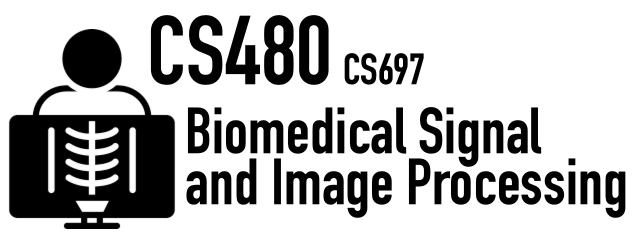
#Assignment 5

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.1 MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [6]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [7]:
# TODO: YOUR_ANSWER

There is one dataset and there are 220 slices in the data.

In [8]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [9]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

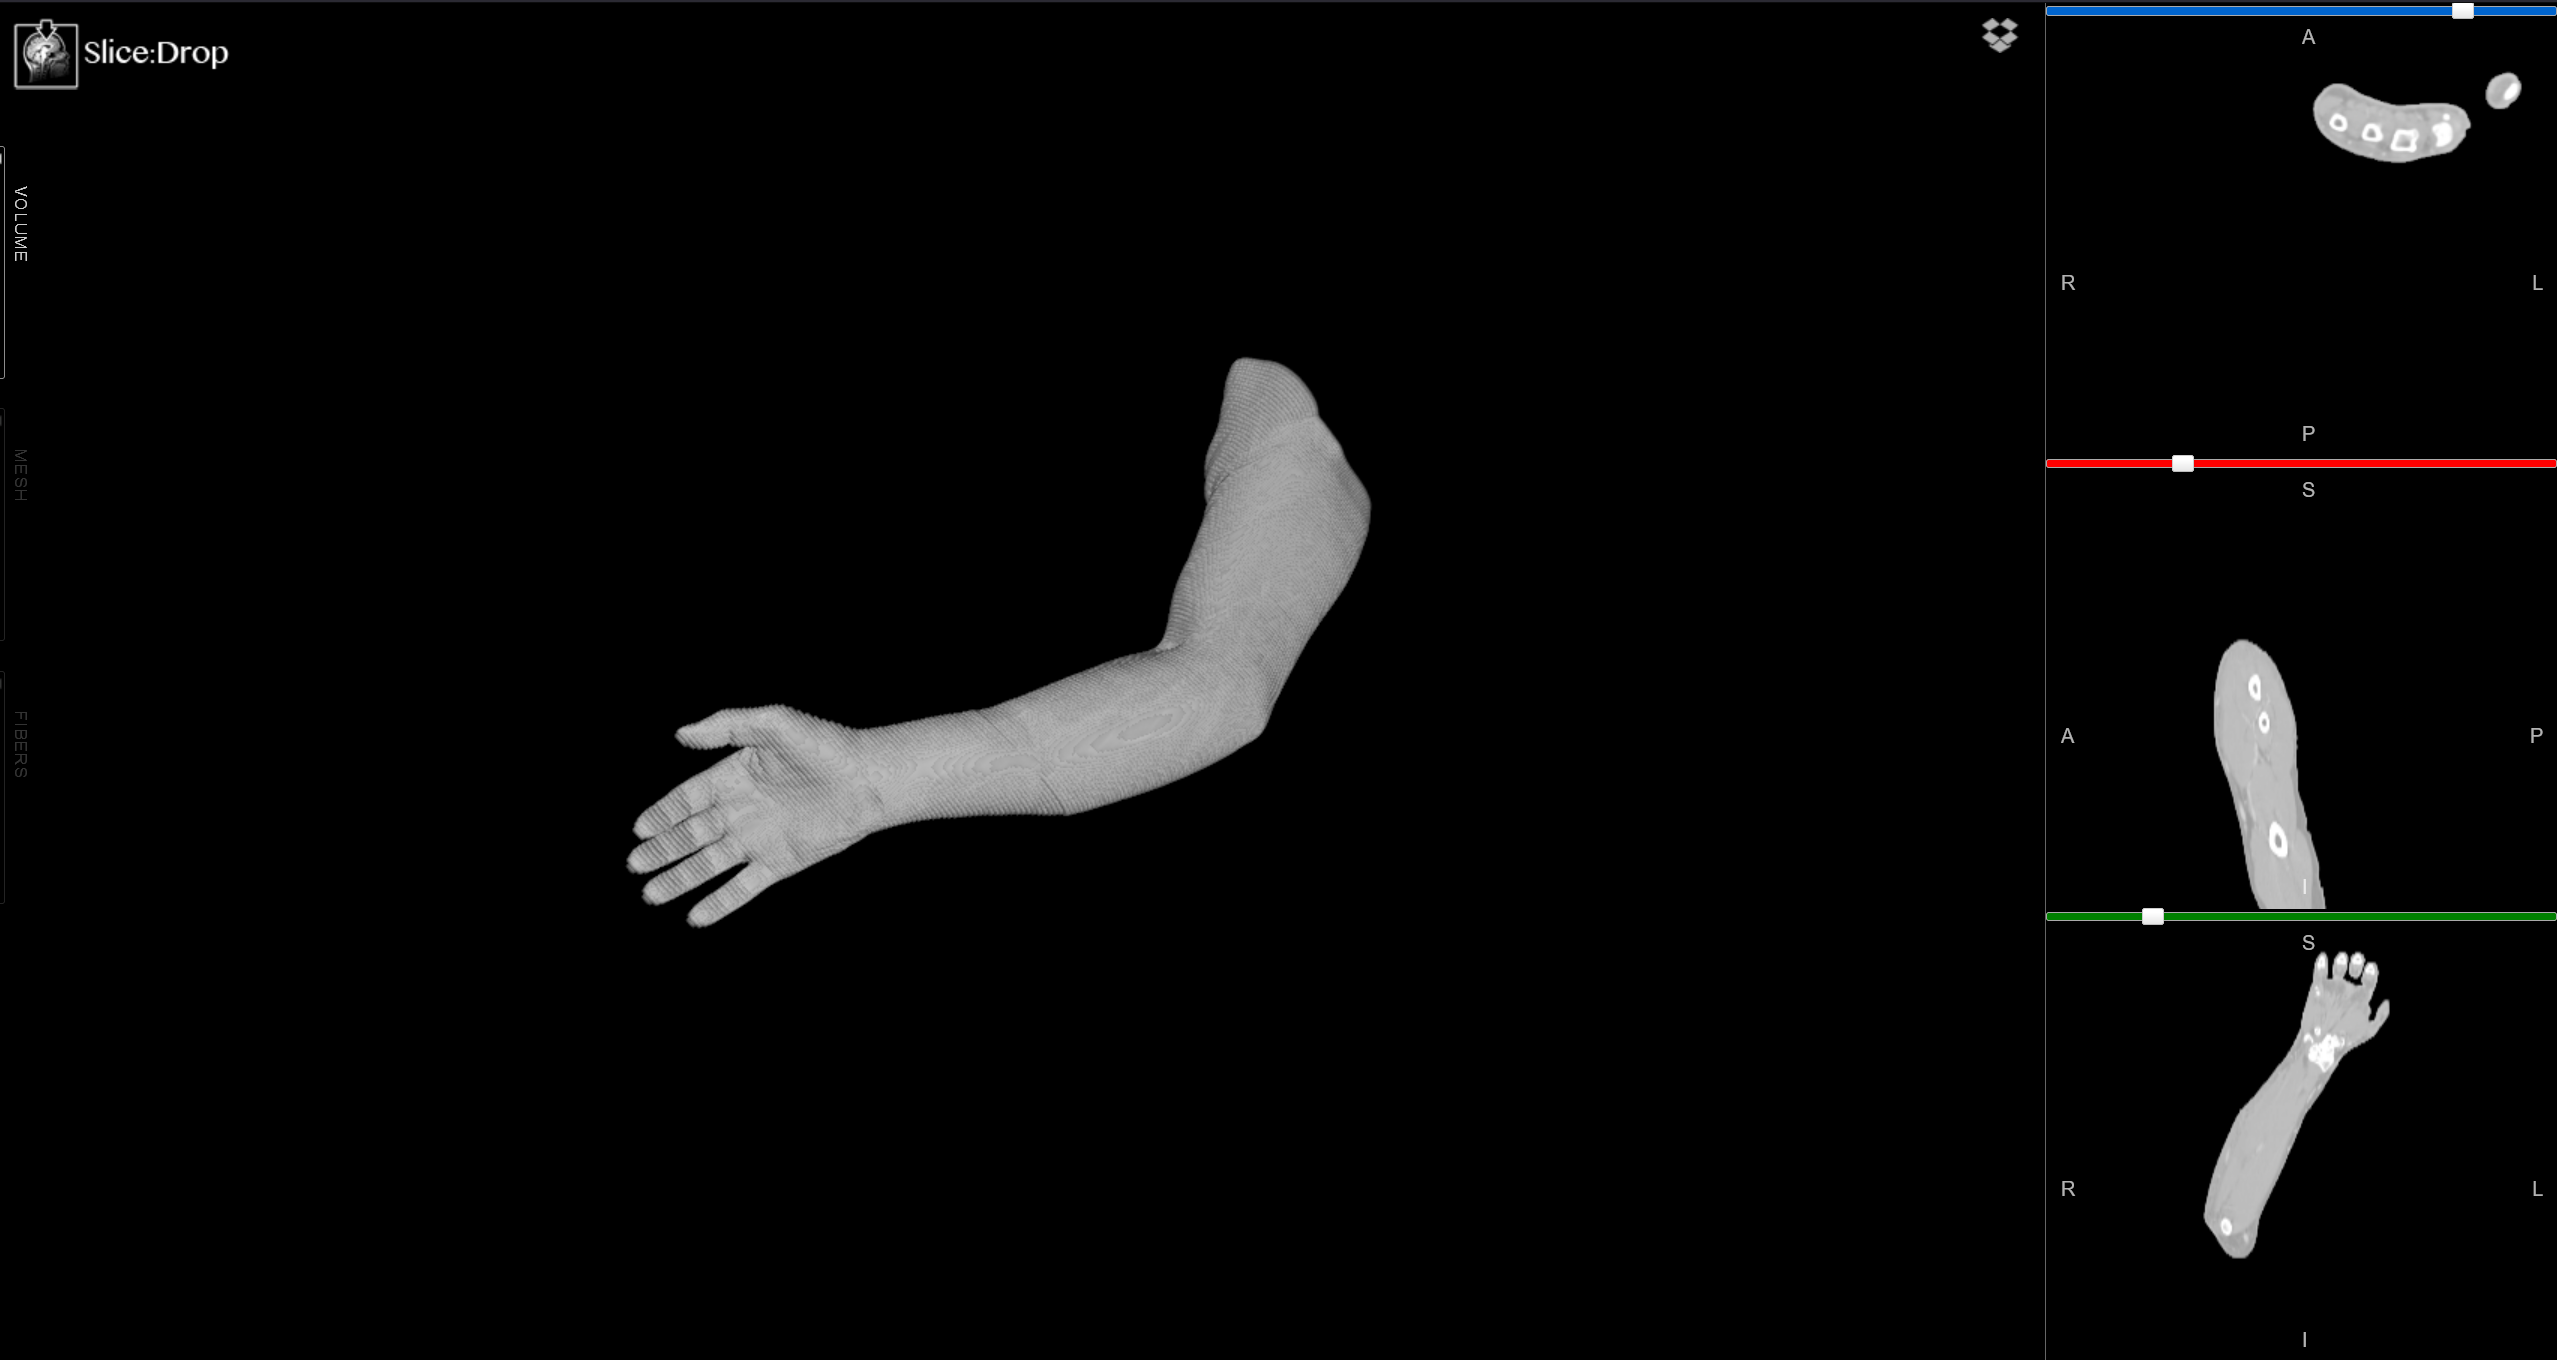

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/CS480/ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [13]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [14]:
from pydicom import dcmread

In [15]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [16]:
import os
import random

In [17]:
files = os.listdir('ct')
files.sort()
img_shape = list(dcmread(os.path.join('ct', files[0])).pixel_array.shape)
img_shape.append(len(files))
img_3d = np.zeros(img_shape)

for i, s in enumerate(files):
  img_3d[:,:,i] = dcmread(os.path.join('ct', s)).pixel_array

In [18]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [19]:
ps = dcmread(os.path.join('ct', files[0])).PixelSpacing
ss = dcmread(os.path.join('ct', files[0])).SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

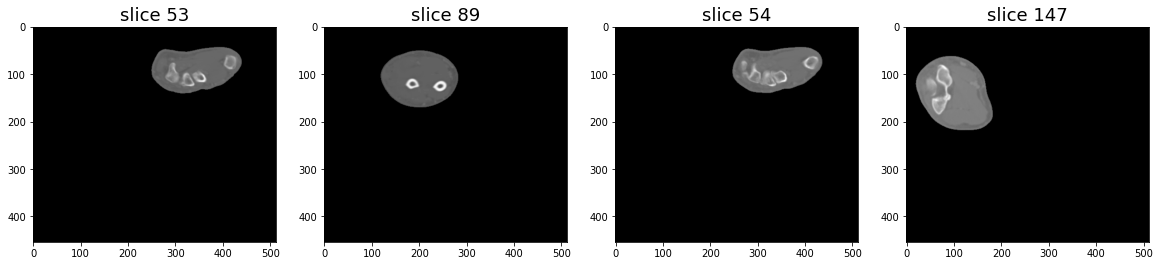

In [81]:
# TODO: YOUR CODE FOR AXIAL
f, images_subplot = plt.subplots(1,4, figsize=(20,20)) 

for i in range(4):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(img_3d[:, :, x], cmap='gray')
  images_subplot[i].set_aspect(ax_aspect)
plt.show()

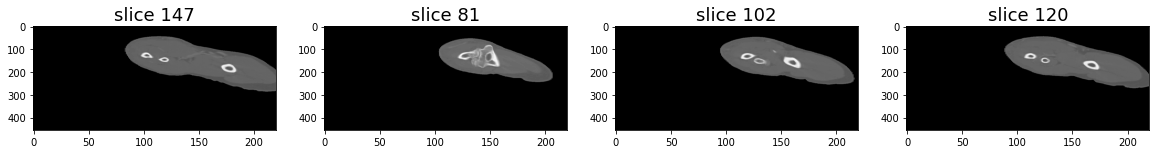

In [85]:
# TODO: YOUR CODE FOR SAGITTAL
f, images_subplot = plt.subplots(1,4, figsize=(20, 4)) 

for i in range(4):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(img_3d[:, x, :], cmap='gray')
  images_subplot[i].set_aspect(sag_aspect)
plt.show()

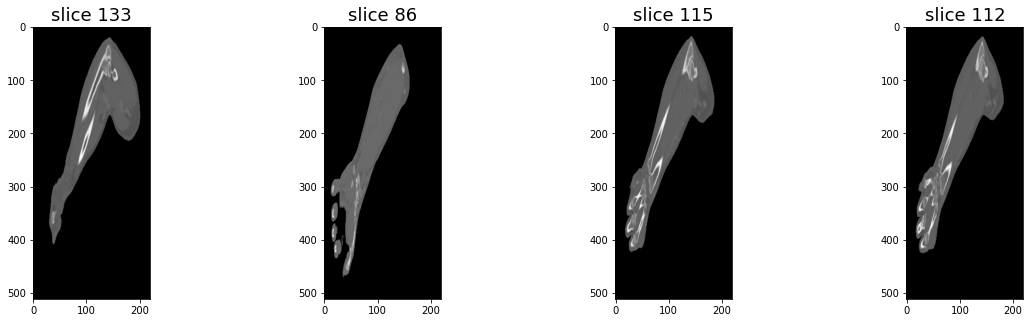

In [165]:
# TODO: YOUR CODE FOR CORONAL
f, images_subplot = plt.subplots(1,4, figsize=(20, 5)) 

for i in range(4):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(img_3d[x, :, :], cmap='gray')
  # images_subplot[i].set_aspect(cor_aspect)
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [ ]:
# TODO: YOUR CODE

In [131]:
first_image = dcmread(os.path.join('ct', files[0]))
wc = first_image.WindowCenter
ww = first_image.WindowWidth
ri = first_image.RescaleIntercept

print("Window center: ", wc)
print("Window width: ", ww)
print("Rescale input: ", ri)

Window center:  30
Window width:  410
Rescale input:  -1024


In [132]:
vmin = wc - ww // 2
vmax = wc + ww // 2

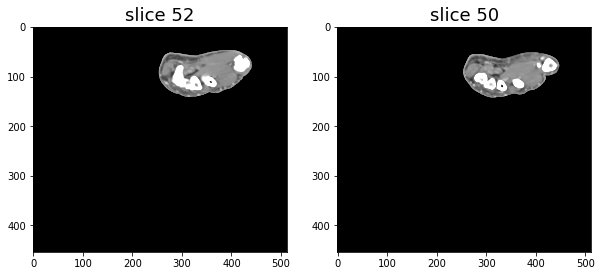

In [133]:
# plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(img_3d[:, :, x] + ri, cmap='gray', vmin = vmin, vmax = vmax)
  images_subplot[i].set_aspect(ax_aspect)
plt.show()

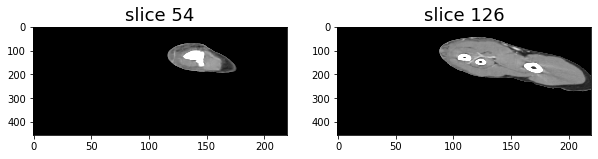

In [134]:
# plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(img_3d[:, x, :] + ri, cmap='gray', vmin = vmin, vmax = vmax)
  images_subplot[i].set_aspect(sag_aspect)
plt.show()

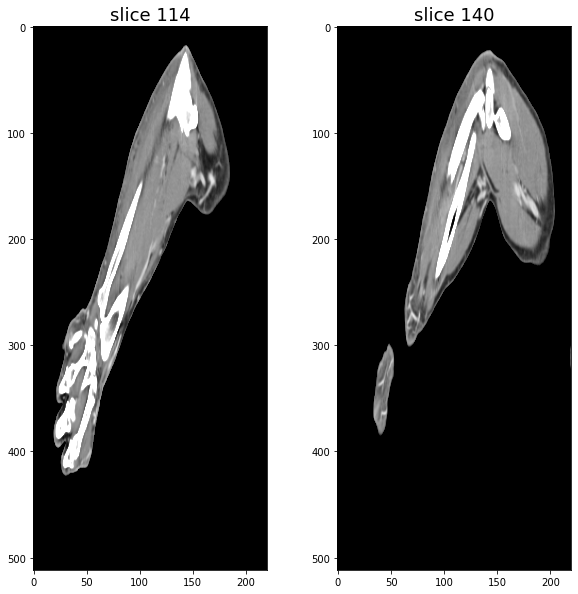

In [136]:
# plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(img_3d[x, :, :] + ri, cmap='gray', vmin = vmin, vmax = vmax)
  # images_subplot[i].set_aspect(cor_aspect)
plt.show()

In [137]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [138]:
# TODO: YOUR CODE

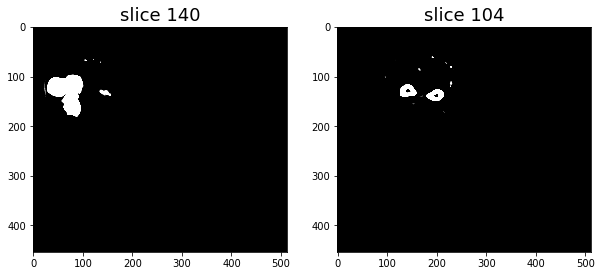

In [139]:
# soft tissues

wc, ww = 120, 40
vmin = wc - ww // 2
vmax = wc + ww // 2
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(img_3d[:, :, x] + ri, cmap='gray', vmin = vmin, vmax = vmax)
plt.show()

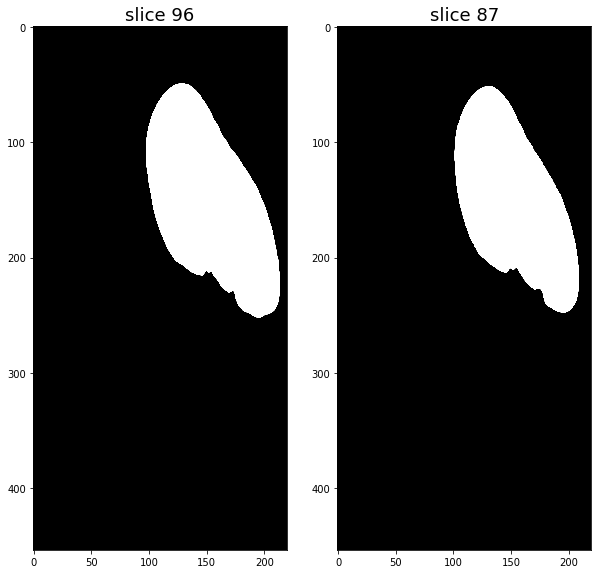

In [140]:
# fat

wc, ww = -160, 40
vmin = wc - ww // 2
vmax = wc + ww // 2
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(img_3d[:, x, :] + ri, cmap='gray', vmin = vmin, vmax = vmax)
plt.show()

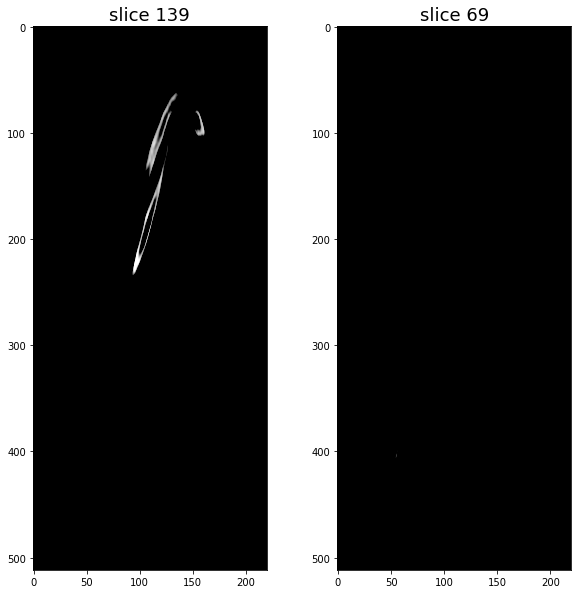

In [142]:
# bones

wc, ww = 1400, 600
vmin = wc - ww // 2
vmax = wc + ww // 2
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(img_3d[x, :, :] + ri, cmap='gray', vmin = vmin, vmax = vmax)
plt.show()

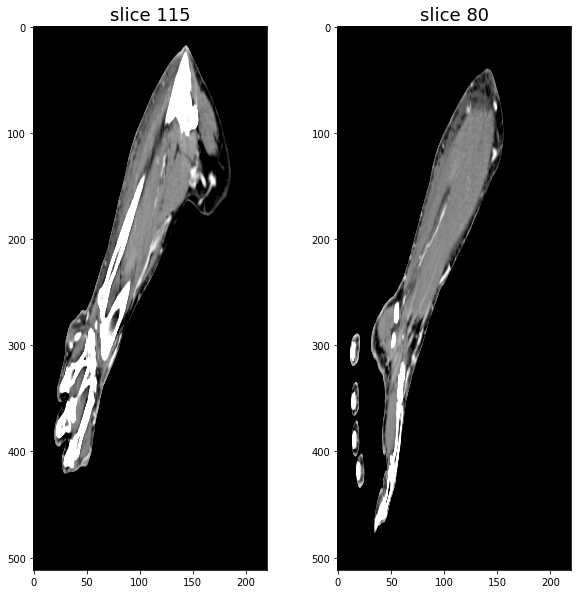

In [143]:
# fat, soft tissues and bones

wc, ww = 50, 250
vmin = wc - ww // 2
vmax = wc + ww // 2
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(img_3d[x, :, :] + ri, cmap='gray', vmin = vmin, vmax = vmax)
plt.show()

In [144]:
# Which values make sense and why?

In [145]:
# TODO: YOUR ANSWER

We can see different type of tissues with different window levels.

fat = -100 to -60

water = 0

soft tissues = 40 to 80

bones = 400 to 1000

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [146]:
# TODO: YOUR CODE TO SEGMENT FAT
threshold = [-60,-100] # based on HU values for fat
new_mask = img_3d.copy()
new_mask = new_mask.astype(np.int16)
new_mask[new_mask + ri < threshold[0]] = True
new_mask[new_mask + ri > threshold[1]] = True
new_mask = np.where(new_mask == True, 0.0, 1.0)

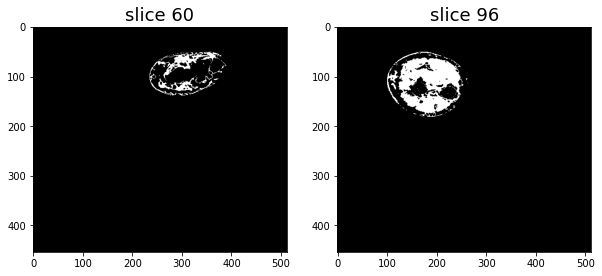

In [154]:
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(new_mask[:, :, x], cmap='gray')
plt.show()

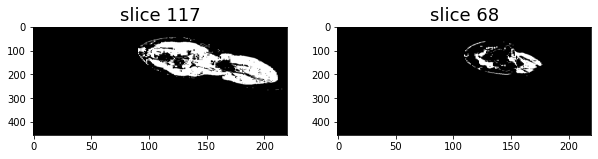

In [155]:
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(new_mask[:, x, :], cmap='gray')
  images_subplot[i].set_aspect(sag_aspect)
plt.show()

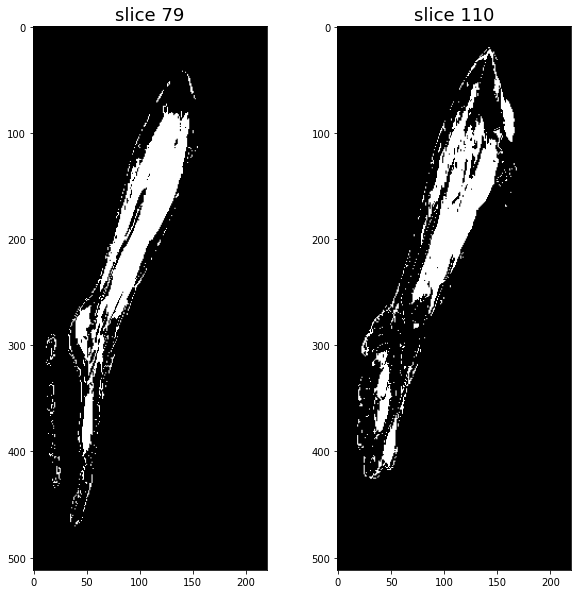

In [156]:
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(new_mask[x, :, :], cmap='gray')
plt.show()

In [152]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
threshold = [40,80] # based on HU values for tissues
new_mask = img_3d.copy()
new_mask = new_mask.astype(np.int16)
new_mask[new_mask + ri < threshold[0]] = True
new_mask[new_mask + ri > threshold[1]] = True
new_mask = np.where(new_mask == True, 0.0, 1.0)

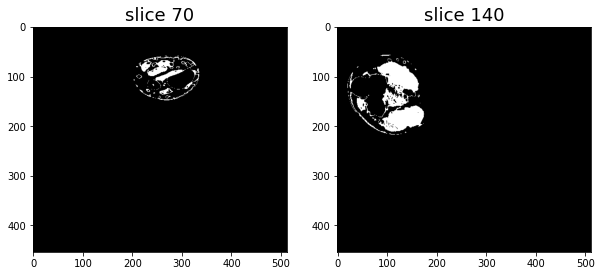

In [157]:
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(new_mask[:, :, x], cmap='gray')
plt.show()

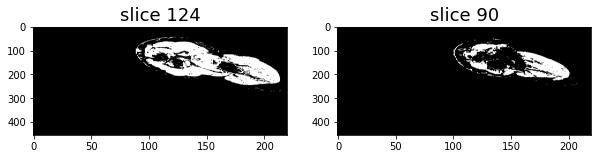

In [159]:
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(new_mask[:, x, :], cmap='gray')
  images_subplot[i].set_aspect(sag_aspect)
plt.show()

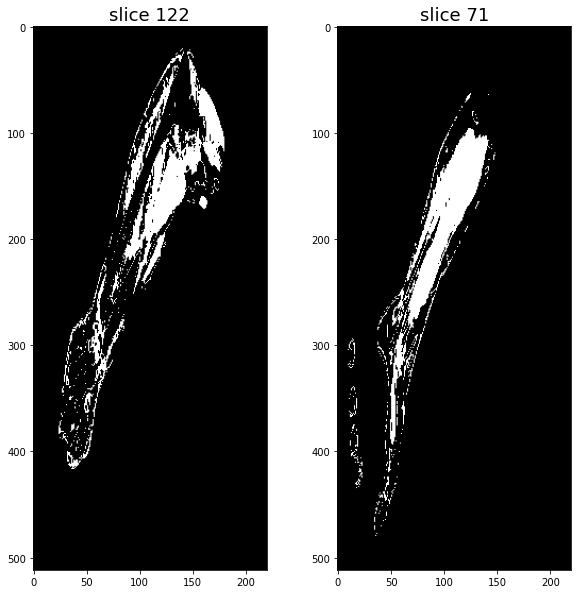

In [160]:
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(new_mask[x, :, :], cmap='gray')
plt.show()

In [161]:
# TODO: YOUR CODE TO SEGMENT BONES
threshold = [400,1000] # based on HU values for bones
new_mask = img_3d.copy()
new_mask = new_mask.astype(np.int16)
new_mask[new_mask + ri < threshold[0]] = True
new_mask[new_mask + ri > threshold[1]] = True
new_mask = np.where(new_mask == True, 0.0, 1.0)

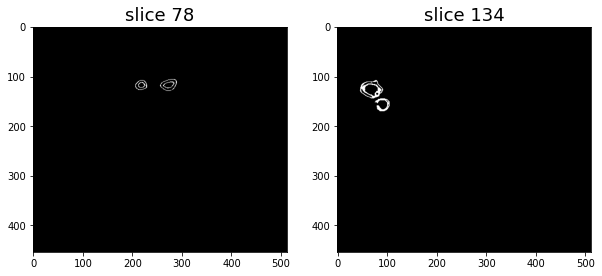

In [162]:
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(new_mask[:, :, x], cmap='gray')
plt.show()

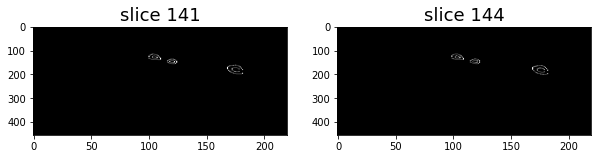

In [163]:
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(new_mask[:, x, :], cmap='gray')
  images_subplot[i].set_aspect(sag_aspect)
plt.show()

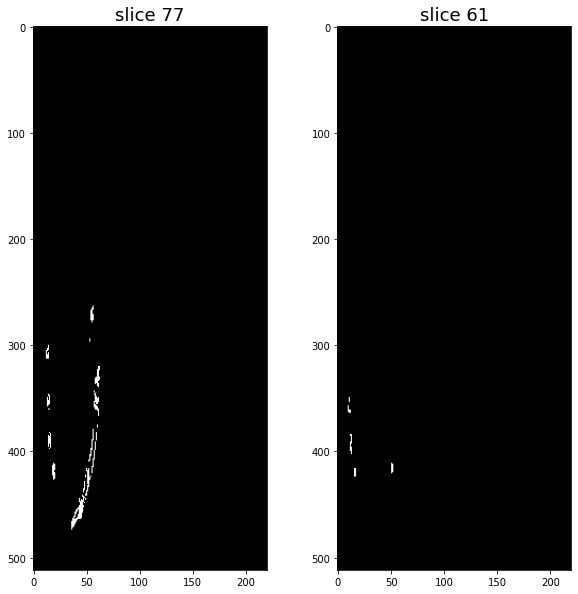

In [164]:
f, images_subplot = plt.subplots(1,2, figsize=(10,10)) 

for i in range(2):
  x = random.randint(50,150)
  images_subplot[i].set_title("slice {}".format(x), fontsize=18)
  images_subplot[i].imshow(new_mask[x, :, :], cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

Based on hounsfield units, segmentations look good.
Difference between fat and soft tissues is not visible clearly, but in the segmentation for the case of bones, we can see that segmentation is really good, and we only see bone when segment it.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""